In [6]:
import axisrules as axis
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

In [7]:
df = pd.read_csv('data/sondages_axes.csv', header=None)
sondages = df.values
dico_poll = {2017:{}, 2022:{}}
cand_2022 = [x.strip() for x in sondages[0][2].split("<")]
cand_2017 = [x.strip() for x in sondages[-1][2].split("<")]

for i in range(len(sondages)):
    year= sondages[i][1]
    institute = sondages[i][0]
    axis_names = [x.strip() for x in sondages[i][2].split("<")]
    if year == 2017:
        axis_v = [cand_2017.index(x) for x in axis_names]
    else:
        axis_v = [cand_2022.index(x) for x in axis_names]
    dico_poll[year][institute] = axis_v


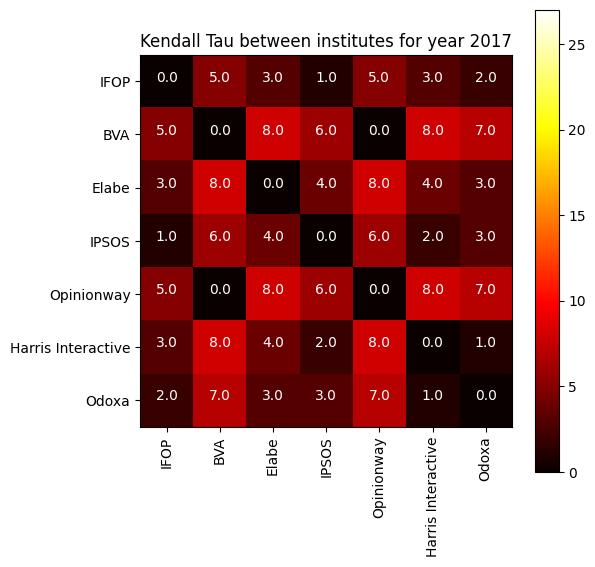

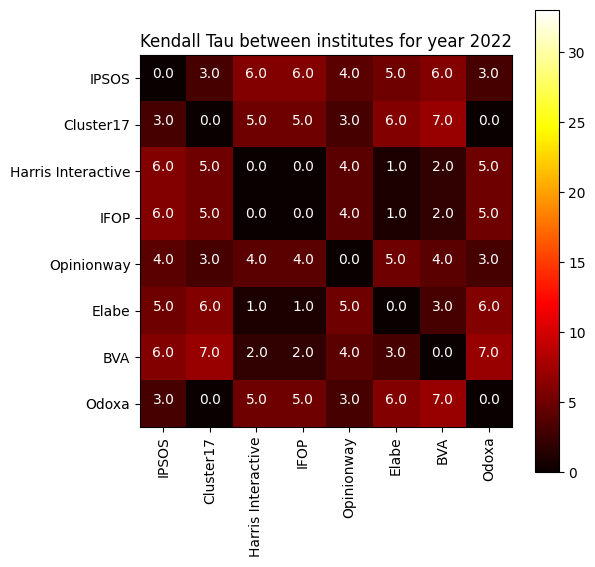

In [8]:
for y in [2017,2022]:
    dico_poll_y = dico_poll[y]
    tab = np.zeros((len(dico_poll_y), len(dico_poll_y)))
    for i, (k1, v1) in enumerate(dico_poll_y.items()):
        for j, (k2, v2) in enumerate(dico_poll_y.items()):
            if i != j:
                tab[i,j] = axis.kandallTau(v1,v2)

    plt.figure(figsize=(6,6))
    if y == 2022:
        max_v = 33
    else:
        max_v = 27
    plt.imshow(tab, cmap='hot', interpolation='nearest', vmin=0, vmax=max_v)
    plt.xticks(range(len(dico_poll_y)), dico_poll_y.keys(), rotation='vertical')
    plt.yticks(range(len(dico_poll_y)), dico_poll_y.keys())
    # write in white in the cells 
    for i, j in itertools.product(range(tab.shape[0]), range(tab.shape[1])):
        plt.text(j, i, round(tab[i, j],2),
                 horizontalalignment="center",
                 color="white")
    plt.colorbar()
    plt.title("Kendall Tau between institutes for year {}".format(y))
    plt.savefig("images/kendall_tau_{}.png".format(y))
    plt.show()
    

In [9]:

dico_rules = {2017:{}, 2022:{}}

df_2017 = pd.read_csv('data/french_axis_yes_w_11.csv')
df_2017 = df_2017[df_2017['year'] == "France 2017"]
df_2017 = df_2017[df_2017["dataset"] == "Online"][["rule", "axis"]]
for rule, axisv in df_2017.values:
    axis_names = [x.strip() for x in axisv.split("<")]
    dico_rules[2017][rule] = [cand_2017.index(x) for x in axis_names]


df_2022 = pd.read_csv('data/french_axis_yes_w_12.csv')
df_2022 = df_2022[df_2022['year'] == "France 2022"]
df_2022 = df_2022[df_2022["dataset"] == "Online"][["rule", "axis"]]
for rule, axisv in df_2022.values:
    axis_names = [x.strip() for x in axisv.split("<")]
    dico_rules[2022][rule] = [cand_2022.index(x) for x in axis_names]

axis_vd_rank_2017 = "François Fillon < François Asselineau < Jacques Cheminade < Emmanuel Macron <  Benoît Hamon <  Jean-Luc Mélenchon < Philippe Poutou < Nathalie Arthaud < Jean Lassalle < Nicolas Dupont-Aignan < Marine Le Pen"

axis_ft_rank_2017 = "Nathalie Arthaud < Philippe Poutou < Jean Lassalle  <  Jean-Luc Mélenchon <  Benoît Hamon < Emmanuel Macron < François Fillon  < Nicolas Dupont-Aignan < Marine Le Pen < François Asselineau < Jacques Cheminade "

axis_vd_rank_2022 = "Nicolas Dupont-Aignan < Jean Lassalle < Fabien Roussel < Nathalie Arthaud < Philippe Poutou < Jean-Luc Mélenchon < Yannick Jadot < Anne Hidalgo  < Emmanuel Macron < Valérie Pecresse < Marine Le Pen <  Eric Zemmour"
axis_ft_rank_2022 = "Nathalie Arthaud < Philippe Poutou < Fabien Roussel < Jean-Luc Mélenchon < Anne Hidalgo < Yannick Jadot < Emmanuel Macron < Valérie Pecresse < Jean Lassalle < Marine Le Pen < Nicolas Dupont-Aignan < Eric Zemmour"

dico_rules[2017]["vd-rank"] = [cand_2017.index(x.strip()) for x in axis_vd_rank_2017.split("<")]
dico_rules[2017]["ft-rank"] = [cand_2017.index(x.strip()) for x in axis_ft_rank_2017.split("<")]
dico_rules[2022]["vd-rank"] = [cand_2022.index(x.strip()) for x in axis_vd_rank_2022.split("<")]
dico_rules[2022]["ft-rank"] = [cand_2022.index(x.strip()) for x in axis_ft_rank_2022.split("<")]



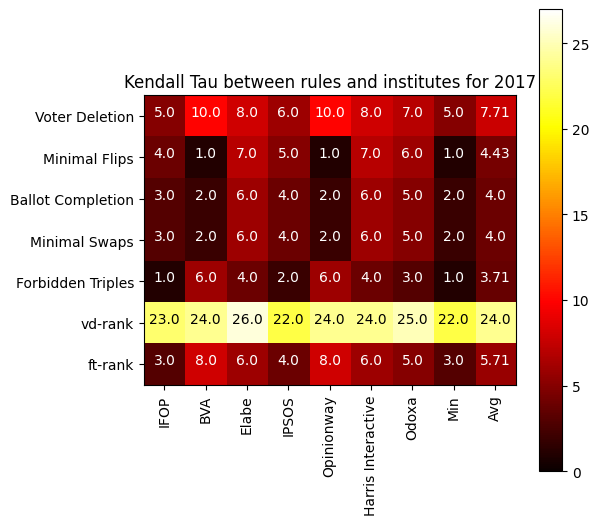

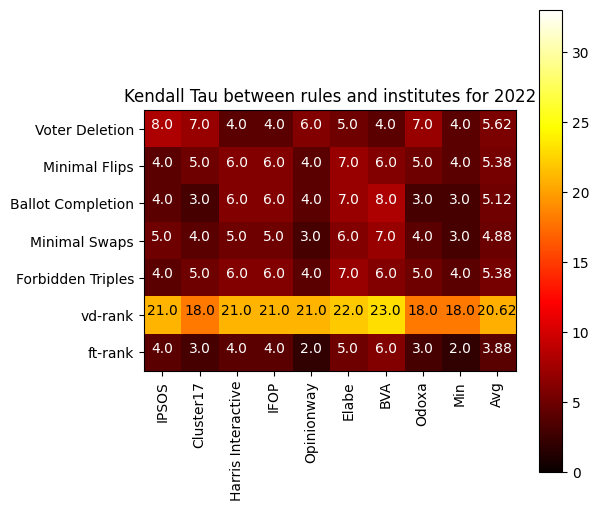

In [10]:
for y in [2017,2022]:
    # rules on X and poll institues on Y

    dico_rules_y = dico_rules[y]
    dico_poll_y = dico_poll[y]
    tab = np.zeros((len(dico_rules_y), len(dico_poll_y)+2))
    for i, (k1, v1) in enumerate(dico_rules_y.items()):
        for j, (k2, v2) in enumerate(dico_poll_y.items()):
            tab[i,j] = min(axis.kandallTau(v1,v2), axis.kandallTau(v1[::-1],v2))

        tab[i,-2] = min(tab[i,:-2])
        tab[i,-1] = np.mean(tab[i,:-2])
    
    plt.figure(figsize=(6,6))
    if y == 2022:
        max_v = 33
    else:
        max_v = 27
    plt.imshow(tab, cmap='hot', interpolation='nearest', vmin=0, vmax=max_v)
    plt.xticks(range(len(dico_poll_y)+2), list(dico_poll_y.keys())+["Min", "Avg"], rotation='vertical')
    plt.yticks(range(len(dico_rules_y)), dico_rules_y.keys())
    # write in white in the cells
    for i, j in itertools.product(range(tab.shape[0]), range(tab.shape[1])):
        plt.text(j, i, round(tab[i, j],2),
                 horizontalalignment="center",
                 color="white" if tab[i,j] < 15 else "black")
    plt.colorbar()
    plt.title("Kendall Tau between rules and institutes for {}".format(y))
    plt.savefig("images/kendall_tau_rules_{}.png".format(y))

    plt.show()